In [15]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [16]:
#onecall = True  # 8 days
onecall = False # 5 days

In [17]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [18]:
onecall = False

In [19]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [20]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1732017600, 'main': {'temp': 12.3, 'feels_like': 11.91, 'temp_min': 12.23, 'temp_max': 12.3, 'pressure': 1000, 'sea_level': 1000, 'grnd_level': 989, 'humidity': 89, 'temp_kf': 0.07}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 7.43, 'deg': 252, 'gust': 17.21}, 'visibility': 4944, 'pop': 1, 'rain': {'3h': 3.61}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-19 12:00:00'}, {'dt': 1732028400, 'main': {'temp': 11.26, 'feels_like': 10.56, 'temp_min': 10.72, 'temp_max': 11.26, 'pressure': 1000, 'sea_level': 1000, 'grnd_level': 989, 'humidity': 81, 'temp_kf': 0.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 7.82, 'deg': 268, 'gust': 17.17}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 2.99}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-19 15:00:00'}, {'dt':

In [21]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1732017600
main          {'temp': 12.3, 'feels_like': 11.91, 'temp_min'...
weather       [{'id': 501, 'main': 'Rain', 'description': 'm...
clouds                                             {'all': 100}
wind                 {'speed': 7.43, 'deg': 252, 'gust': 17.21}
visibility                                                 4944
pop                                                         1.0
rain                                               {'3h': 3.61}
sys                                                {'pod': 'd'}
dt_txt                                      2024-11-19 12:00:00
snow                                                        NaN
Name: 0, dtype: object


In [22]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt', 'snow'],
      dtype='object')

In [23]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   19/11 13:00  13:00     12.30     12.23
1   19/11 16:00  16:00     11.26     10.72
2   19/11 19:00  19:00      9.14      9.14
3   19/11 22:00  22:00      6.99      6.99
4   20/11 01:00  01:00      6.27      6.27
5   20/11 04:00  04:00      5.62      5.62
6   20/11 07:00  07:00      4.98      4.98
7   20/11 10:00  10:00      5.29      5.29
8   20/11 13:00  13:00      7.20      7.20
9   20/11 16:00  16:00      7.53      7.53
10  20/11 19:00  19:00      6.38      6.38
11  20/11 22:00  22:00      5.63      5.63
12  21/11 01:00  01:00      3.97      3.97
13  21/11 04:00  04:00      3.31      3.31
14  21/11 07:00  07:00      3.94      3.94
15  21/11 10:00  10:00      4.25      4.25
16  21/11 13:00  13:00      4.21      4.21
17  21/11 16:00  16:00      2.96      2.96
18  21/11 19:00  19:00      2.32      2.32
19  21/11 22:00  22:00      2.40      2.40
20  22/11 01:00  01:00      1.85      1.85
21  22/11 04:00  04:00      2.42      2.42
22  22/11 0

In [24]:
_5days['human_date']

0     19/11 13:00
1     19/11 16:00
2     19/11 19:00
3     19/11 22:00
4     20/11 01:00
5     20/11 04:00
6     20/11 07:00
7     20/11 10:00
8     20/11 13:00
9     20/11 16:00
10    20/11 19:00
11    20/11 22:00
12    21/11 01:00
13    21/11 04:00
14    21/11 07:00
15    21/11 10:00
16    21/11 13:00
17    21/11 16:00
18    21/11 19:00
19    21/11 22:00
20    22/11 01:00
21    22/11 04:00
22    22/11 07:00
23    22/11 10:00
24    22/11 13:00
25    22/11 16:00
26    22/11 19:00
27    22/11 22:00
28    23/11 01:00
29    23/11 04:00
30    23/11 07:00
31    23/11 10:00
32    23/11 13:00
33    23/11 16:00
34    23/11 19:00
35    23/11 22:00
36    24/11 01:00
37    24/11 04:00
38    24/11 07:00
39    24/11 10:00
Name: human_date, dtype: object

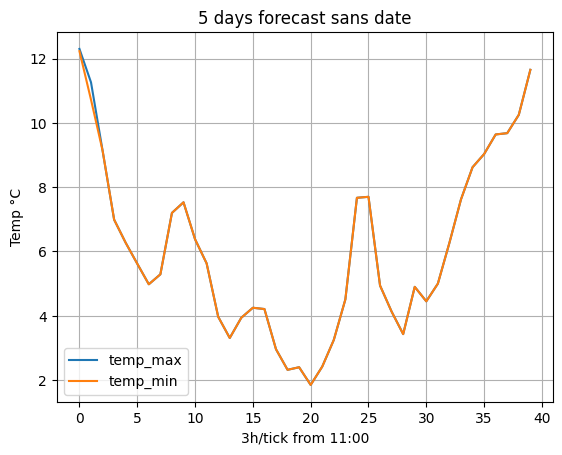

In [25]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [26]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

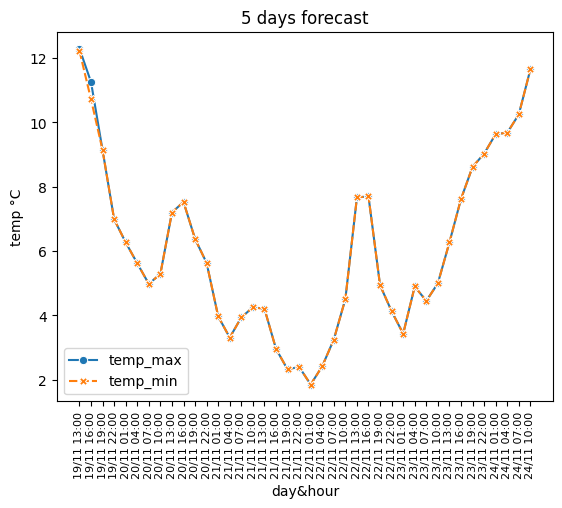

In [27]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

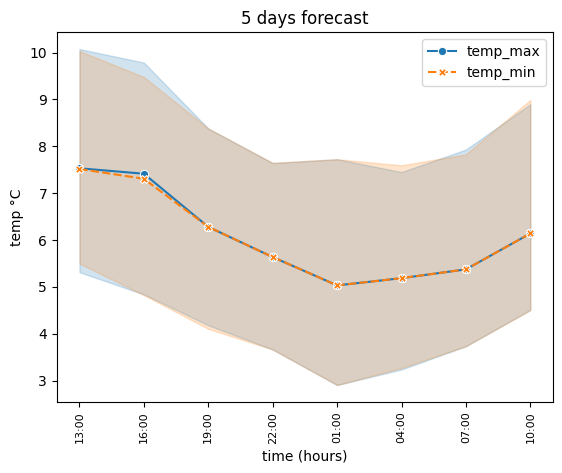

In [28]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 